In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
#Changing the month column to index and read as datetime type.
data=pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
#Changing the column name
data.columns=['passengers']
data.tail()

,passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [39]:
df=data.index[119:144]
df

DatetimeIndex(['1958-12-01', '1959-01-01', '1959-02-01', '1959-03-01',
               '1959-04-01', '1959-05-01', '1959-06-01', '1959-07-01',
               '1959-08-01', '1959-09-01', '1959-10-01', '1959-11-01',
               '1959-12-01', '1960-01-01', '1960-02-01', '1960-03-01',
               '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01',
               '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01',
               '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [23]:
mask = data.index=="1959-01-01"
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

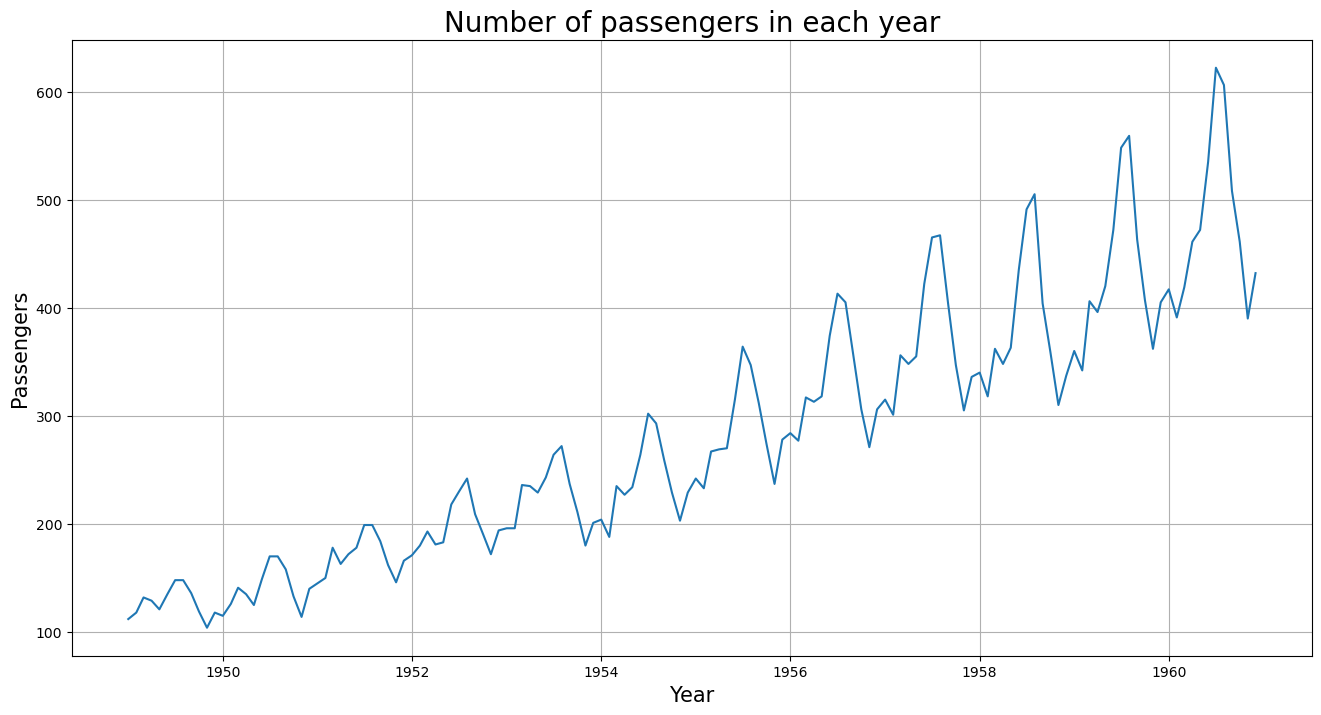

In [5]:
#Plotting passengers data
plt.figure(figsize=(16,8))
plt.plot(data['passengers'])

plt.title('Number of passengers in each year',fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel('Passengers',fontsize=15)
plt.grid()

1. The total of passengers increases as the year increase. 
2. There is a periodic cycle in 12 month where it starts increasing in 12 month.

1. Autocorrelation: The degree of similarity between a given time series and a lagged version of itself over successive time intervals.
2. Partial autocorrelation: A summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

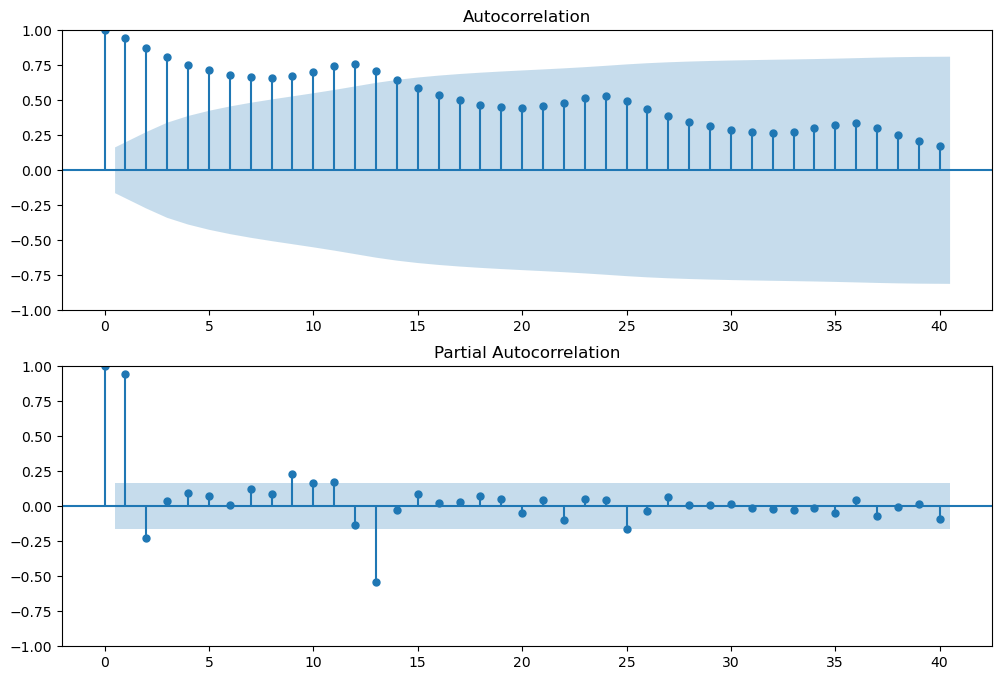

In [6]:
import statsmodels.api as sm
#Plotting the Autocorrelation of the passengers column.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.passengers, lags=40, ax=ax1)

#Plotting the Partial Autocorrelation of the passengers column.
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.passengers, lags=40, ax=ax2,method='ywmle')

In [7]:
#Taking the first order difference
diff = data.diff(periods=1).dropna()

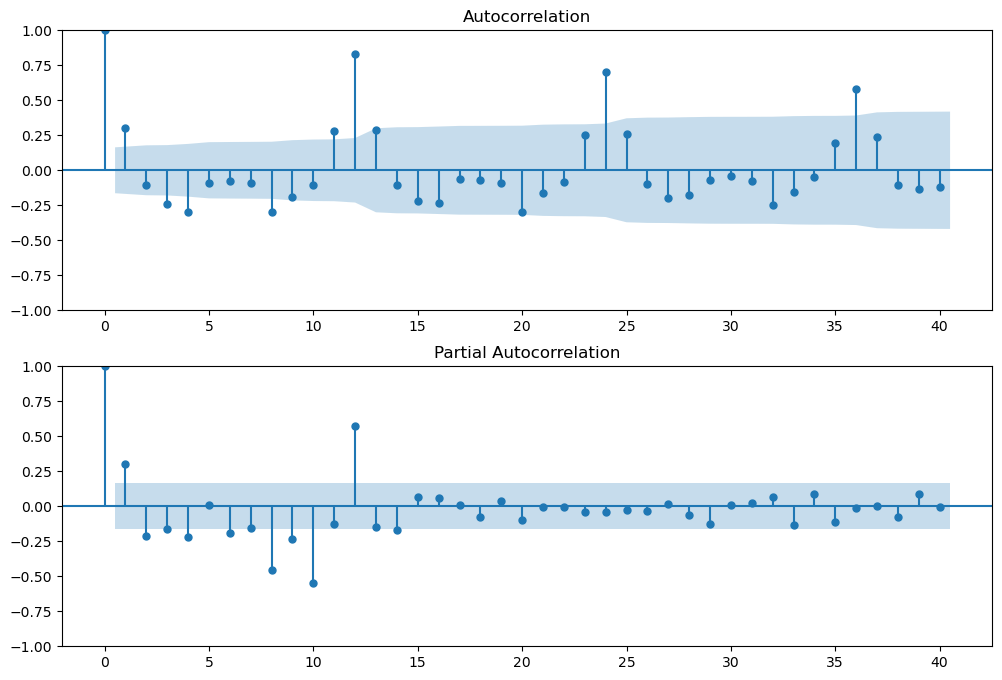

In [8]:
#Autocorrelation graph after taking the first order difference
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff, lags=40, ax=ax1)

#Partial Autocorrelation graph after taking the first order difference
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=40, ax=ax2,method='ywmle')

As you can see in the autocorrelation, there is a strong correlation when the x lable cycles 12 month.

/Users/asahinago/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/asahinago/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39011D+00    |proj g|=  6.71808D-02

At iterate    5    f=  3.38171D+00    |proj g|=  1.99488D-02

At iterate   10    f=  3.37070D+00    |proj g|=  2.99585D-02

At iterate   15    f=  3.36153D+00    |proj g|=  9.06270D-03

At iterate   20    f=  3.36011D+00    |proj g|=  2.39716D-03

At iterate   25    f=  3.36007D+00    |proj g|=  8.92666D-04

At iterate   30    f=  3.36005D+00    |proj g|=  4.99198D-04

At iterate   35    f=  3.36002D+00    |proj g|=  1.33366D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

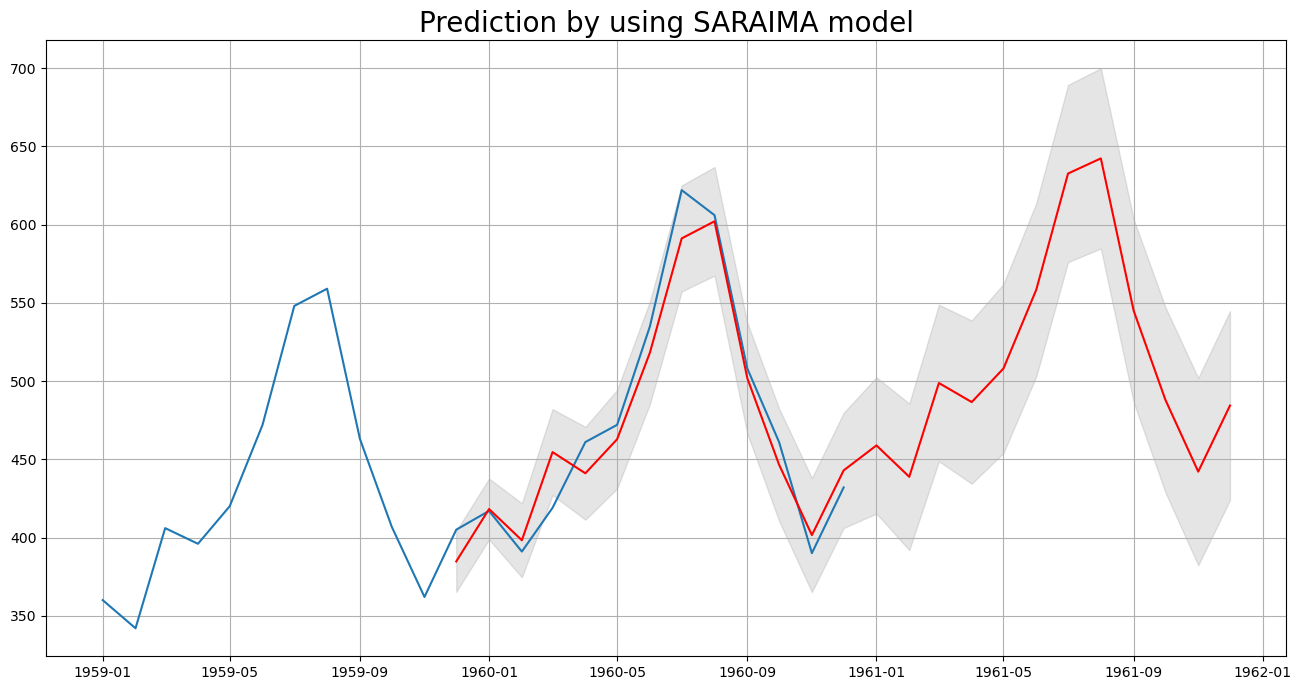

In [9]:
#Taking series type
ts=data.passengers

# Get train data(in this case, year before 1959)
ss=ts[ts.index.year<=1959]

# import SARIMA lib
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Creating model
#AR次数、差分次数、MA次数= order(2,1,2)
#季節性のAR次数、季節性の差分次数、季節性のMA次数、季節性の周期
sarima=SARIMAX(ss,order=(2,1,2),seasonal_order=(1,1,1,12)).fit()

# Making a prediction 
predict=sarima.predict('1959-12-01','1961-12-01')
predict_dy=sarima.get_prediction('1959-12-01','1961-12-01')
predict_dy_ci=predict_dy.conf_int(alpha=0.05)

plt.figure(figsize=(16,8))
plt.plot(ts[ts.index.year>1958])
plt.plot(predict,'r')
plt.fill_between(predict_dy_ci.index,
                predict_dy_ci.iloc[:,0],
                predict_dy_ci.iloc[:,1],
                color='gray',
                alpha=0.2)
plt.title('Prediction by using SARAIMA model',fontsize=20)
plt.grid()